In [1]:
import os
from tqdm import tqdm
from PIL import Image
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import jaccard_score
import joblib

In [30]:
Images, Masks = [], []

# Getting the absolute path to the current script's directory
script_directory = os.path.dirname(os.path.abspath("Test.ipynb"))

# Constructing the full path to the "Water Bodies Dataset" folder
dataset_path = os.path.join(script_directory, "Water Bodies Dataset")

# Looking through all files under the dataset folder
for dirname, _, filenames in os.walk(dataset_path):
    for filename in tqdm(filenames):
        # Open the image using the Image library
        image = Image.open(os.path.join(dirname, filename))
        # Resize the image for ease of use
        image = image.resize((128, 128))
        # Turn into a numpy array
        image = np.array(image)

        # If the file is from the "Images" folder, add the loaded image to the Images list
        if "Images" in dirname:
            Images.append(image)
        # Otherwise, it is a mask, so add the loaded image to the Masks list
        elif "Masks" in dirname:
            Masks.append(np.where(image > 100, 255, 0))
        del image

np.save("Images.npy", Images)
np.save("Masks.npy", Masks)

0it [00:00, ?it/s]
100%|██████████| 2841/2841 [00:11<00:00, 249.76it/s]


In [31]:
Images = np.load("Images.npy")
Masks = np.load("Masks.npy")

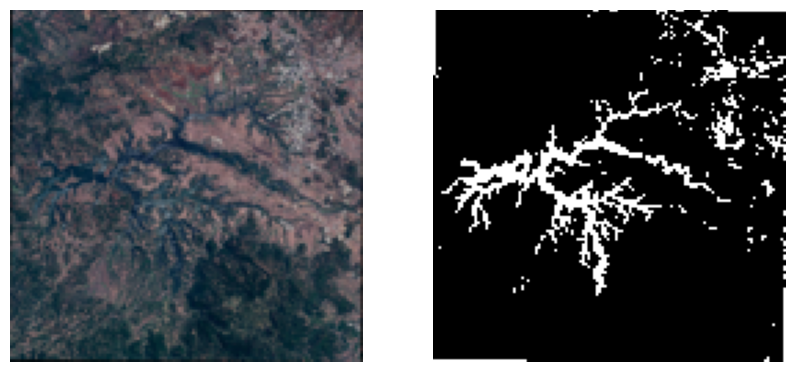

In [19]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(Images[0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(Masks[0], cmap='gray')
plt.axis('off')

plt.show()

In [20]:
def to_gradient(array):
    
    return np.array([[[val, val, val] for val in row] for row in array])

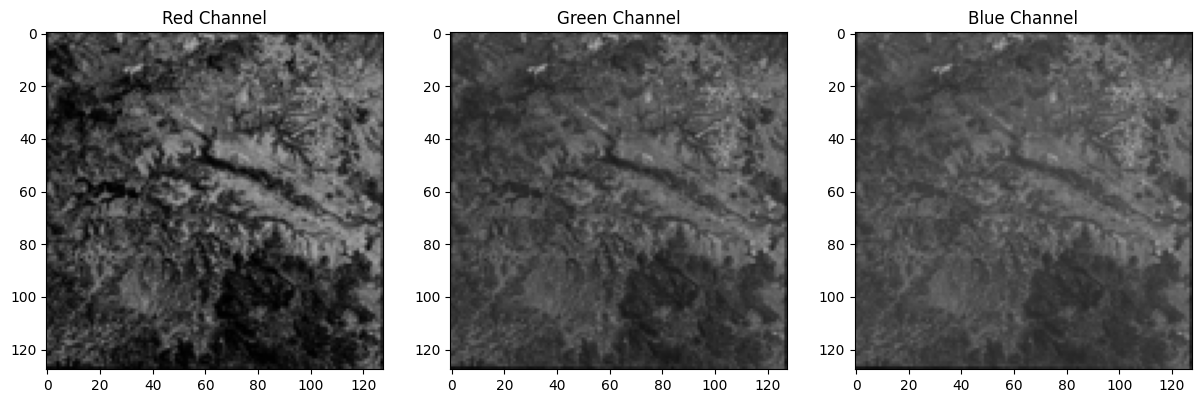

In [21]:
plt.figure(figsize=(20, 5))

# red channel
plt.subplot(1, 4, 1)
plt.imshow(to_gradient(Images[0][:, :, 0]))
plt.title("Red Channel")

# green channel
plt.subplot(1, 4, 2)
plt.imshow(to_gradient(Images[0][:, :, 1]))
plt.title("Green Channel")

# blue channel
plt.subplot(1, 4, 3)
plt.imshow(to_gradient(Images[0][:, :, 2]))
plt.title("Blue Channel")

plt.show()

In [22]:
def threshold(image, t=128):
    binary_image = np.where(image < t, 255, 0)
    return binary_image

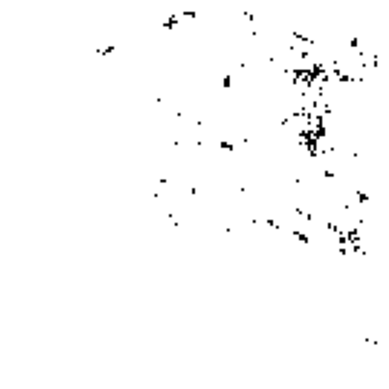

In [23]:
pic0_threshold_128 = to_gradient(threshold(Images[0][:, :, 2]))
plt.imshow(pic0_threshold_128)
plt.axis('off')
plt.show()

In [24]:
# Flatten the ground truth mask and the thresholded image
ground_truth = Masks[0].flatten()
thresholded_image = pic0_threshold_128.flatten()

# Ensure binary masks
ground_truth = (ground_truth > 0).astype(int)
thresholded_image = (thresholded_image > 0).astype(int)

# Compute the IoU score
iou_score = jaccard_score(ground_truth, thresholded_image)

print(f"IoU Score: {iou_score}")

IoU Score: 0.09030674846625766


  2%|▏         | 1/51 [00:00<00:48,  1.02it/s]

The mean accuracy for threshold 0 is 0.6439013671875


  4%|▍         | 2/51 [00:01<00:48,  1.00it/s]

The mean accuracy for threshold 5 is 0.688841552734375


  6%|▌         | 3/51 [00:03<00:51,  1.08s/it]

The mean accuracy for threshold 10 is 0.690101318359375


  8%|▊         | 4/51 [00:04<00:50,  1.08s/it]

The mean accuracy for threshold 15 is 0.69107421875


 10%|▉         | 5/51 [00:05<00:49,  1.08s/it]

The mean accuracy for threshold 20 is 0.69152099609375


 12%|█▏        | 6/51 [00:06<00:49,  1.10s/it]

The mean accuracy for threshold 25 is 0.6922412109375


 14%|█▎        | 7/51 [00:07<00:49,  1.13s/it]

The mean accuracy for threshold 30 is 0.696422119140625


 16%|█▌        | 8/51 [00:08<00:49,  1.15s/it]

The mean accuracy for threshold 35 is 0.698682861328125


 18%|█▊        | 9/51 [00:10<00:49,  1.18s/it]

The mean accuracy for threshold 40 is 0.6993505859375


 20%|█▉        | 10/51 [00:11<00:49,  1.20s/it]

The mean accuracy for threshold 45 is 0.6919970703125


 22%|██▏       | 11/51 [00:12<00:48,  1.22s/it]

The mean accuracy for threshold 50 is 0.682757568359375


 24%|██▎       | 12/51 [00:13<00:47,  1.22s/it]

The mean accuracy for threshold 55 is 0.674232177734375


 25%|██▌       | 13/51 [00:14<00:45,  1.20s/it]

The mean accuracy for threshold 60 is 0.663792724609375


 27%|██▋       | 14/51 [00:16<00:44,  1.20s/it]

The mean accuracy for threshold 65 is 0.658673095703125


 29%|██▉       | 15/51 [00:17<00:44,  1.23s/it]

The mean accuracy for threshold 70 is 0.64093994140625


 31%|███▏      | 16/51 [00:18<00:43,  1.24s/it]

The mean accuracy for threshold 75 is 0.6282275390625


 33%|███▎      | 17/51 [00:19<00:41,  1.22s/it]

The mean accuracy for threshold 80 is 0.6196630859375


 35%|███▌      | 18/51 [00:21<00:40,  1.22s/it]

The mean accuracy for threshold 85 is 0.60968994140625


 37%|███▋      | 19/51 [00:22<00:38,  1.19s/it]

The mean accuracy for threshold 90 is 0.6039404296875


 39%|███▉      | 20/51 [00:23<00:37,  1.21s/it]

The mean accuracy for threshold 95 is 0.5991455078125


 41%|████      | 21/51 [00:24<00:36,  1.21s/it]

The mean accuracy for threshold 100 is 0.579921875


 43%|████▎     | 22/51 [00:26<00:36,  1.25s/it]

The mean accuracy for threshold 105 is 0.551419677734375


 45%|████▌     | 23/51 [00:27<00:35,  1.27s/it]

The mean accuracy for threshold 110 is 0.522310791015625


 47%|████▋     | 24/51 [00:28<00:33,  1.26s/it]

The mean accuracy for threshold 115 is 0.497337646484375


 49%|████▉     | 25/51 [00:29<00:31,  1.22s/it]

The mean accuracy for threshold 120 is 0.4797265625


 51%|█████     | 26/51 [00:30<00:30,  1.21s/it]

The mean accuracy for threshold 125 is 0.47065185546875


 53%|█████▎    | 27/51 [00:32<00:28,  1.20s/it]

The mean accuracy for threshold 130 is 0.44673583984375


 55%|█████▍    | 28/51 [00:33<00:26,  1.16s/it]

The mean accuracy for threshold 135 is 0.426588134765625


 57%|█████▋    | 29/51 [00:34<00:24,  1.12s/it]

The mean accuracy for threshold 140 is 0.42412353515625


 59%|█████▉    | 30/51 [00:35<00:23,  1.11s/it]

The mean accuracy for threshold 145 is 0.4197802734375


 61%|██████    | 31/51 [00:36<00:21,  1.10s/it]

The mean accuracy for threshold 150 is 0.397041015625


 63%|██████▎   | 32/51 [00:37<00:20,  1.07s/it]

The mean accuracy for threshold 155 is 0.380498046875


 65%|██████▍   | 33/51 [00:38<00:18,  1.03s/it]

The mean accuracy for threshold 160 is 0.369010009765625


 67%|██████▋   | 34/51 [00:39<00:17,  1.03s/it]

The mean accuracy for threshold 165 is 0.361678466796875


 69%|██████▊   | 35/51 [00:40<00:15,  1.00it/s]

The mean accuracy for threshold 170 is 0.35834228515625


 71%|███████   | 36/51 [00:41<00:14,  1.02it/s]

The mean accuracy for threshold 175 is 0.356807861328125


 73%|███████▎  | 37/51 [00:42<00:13,  1.01it/s]

The mean accuracy for threshold 180 is 0.35629638671875


 75%|███████▍  | 38/51 [00:43<00:12,  1.01it/s]

The mean accuracy for threshold 185 is 0.35614501953125


 76%|███████▋  | 39/51 [00:44<00:11,  1.01it/s]

The mean accuracy for threshold 190 is 0.356103515625


 78%|███████▊  | 40/51 [00:45<00:10,  1.01it/s]

The mean accuracy for threshold 195 is 0.35610107421875


 80%|████████  | 41/51 [00:46<00:09,  1.01it/s]

The mean accuracy for threshold 200 is 0.3560986328125


 82%|████████▏ | 42/51 [00:47<00:08,  1.00it/s]

The mean accuracy for threshold 205 is 0.3560986328125


 84%|████████▍ | 43/51 [00:48<00:08,  1.04s/it]

The mean accuracy for threshold 210 is 0.3560986328125


 86%|████████▋ | 44/51 [00:49<00:07,  1.07s/it]

The mean accuracy for threshold 215 is 0.3560986328125


 88%|████████▊ | 45/51 [00:50<00:06,  1.10s/it]

The mean accuracy for threshold 220 is 0.3560986328125


 90%|█████████ | 46/51 [00:51<00:05,  1.09s/it]

The mean accuracy for threshold 225 is 0.3560986328125


 92%|█████████▏| 47/51 [00:52<00:04,  1.09s/it]

The mean accuracy for threshold 230 is 0.3560986328125


 94%|█████████▍| 48/51 [00:53<00:03,  1.06s/it]

The mean accuracy for threshold 235 is 0.3560986328125


 96%|█████████▌| 49/51 [00:54<00:02,  1.11s/it]

The mean accuracy for threshold 240 is 0.3560986328125


 98%|█████████▊| 50/51 [00:56<00:01,  1.11s/it]

The mean accuracy for threshold 245 is 0.3560986328125


100%|██████████| 51/51 [00:57<00:00,  1.12s/it]

The mean accuracy for threshold 250 is 0.3560986328125


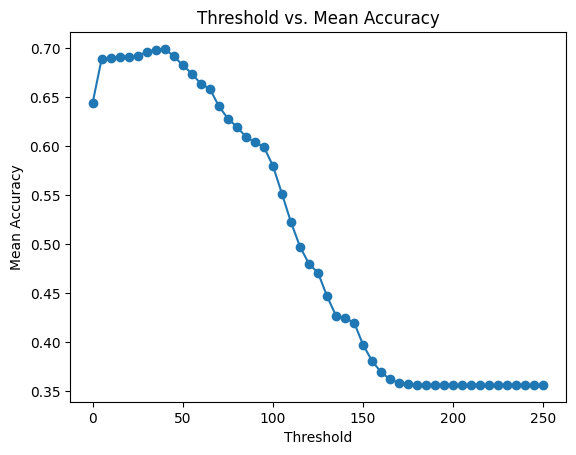

Hence, the best threshold is 40, with accuracy score of 0.6993505859375


In [25]:
# Set a seed for reproducibility
np.random.seed(42)

# Randomly choose 50 indices for evaluation
random_indices = np.random.randint(0, len(Images), 50)

results = []

# For simplicity, evaluate thresholds from 0 to 255 with an increment of 5
threshold_values = range(0, 255, 5)

for threshold_value in tqdm(threshold_values):
    accuracy_results = []
    for idx in random_indices:
        # Apply thresholding correctly
        predicted_mask = to_gradient(threshold(Images[idx][:, :, 2], t=threshold_value)).flatten()
        ground_truth_mask = Masks[idx].flatten()
        accuracy_results.append(accuracy_score(ground_truth_mask, predicted_mask))

    mean_accuracy = np.mean(accuracy_results)
    print(f"The mean accuracy for threshold {threshold_value} is {mean_accuracy}")
    results.append(mean_accuracy)

# Plot the results
plt.plot(threshold_values, results, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Mean Accuracy')
plt.title('Threshold vs. Mean Accuracy')
plt.show()

# Find the best threshold
best_threshold = threshold_values[np.argmax(results)]
best_accuracy = np.max(results)
print(f"Hence, the best threshold is {best_threshold}, with accuracy score of {best_accuracy}")


In [26]:
# Applying the threshold to image 0
predicted_mask = to_gradient(threshold(Images[0][:, :, 2], t=best_threshold)).flatten()

# Calculating the accuracy score between the ground truth mask (Masks[0]) and the predicted mask
accuracy = accuracy_score(Masks[0].flatten(), predicted_mask)

print(f"Accuracy for image 0 using the best threshold ({best_threshold}): {accuracy}")

Accuracy for image 0 using the best threshold (40): 0.90142822265625


In [27]:
train_idx, test_idx = train_test_split(range(len(Images)), train_size=0.8)
train_x, train_y = np.array(Images)[train_idx], np.array([m[:, :, 2] for m in np.array(Masks)[train_idx]])
test_x, test_y = np.array(Images)[test_idx], np.array([m[:, :, 2] for m in np.array(Masks)[test_idx]])
train_y, test_y = train_y.flatten(), test_y.flatten()
train_x, test_x = train_x.reshape(-1, 3), test_x.reshape(-1, 3)

In [28]:
train_x.shape, train_y.shape

# Shape of the training set of images, Shape of the training set of masks
# Output: (train_len * 128 * 128, 3), (train_len * 128 * 128,)

((37224448, 3), (37224448,))

In [32]:
# Create a RandomForestClassifier
RF_model = RandomForestClassifier(max_depth=2, random_state=42, verbose=True)
RF_model.fit(train_x, train_y)
predictions = RF_model.predict(test_x)

joblib.dump(RF_model, 'Random_Forest_Model.pkl')

accuracy = accuracy_score(test_y, predictions)
print(f"Accuracy: {accuracy}")

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  9.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   17.3s


Accuracy: 0.7361047942525264


In [35]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(train_x, train_y)
predictions = knn_model.predict(test_x)

joblib.dump(knn_model, 'KNN.pkl')

accuracy = accuracy_score(test_y, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.761724864242366


In [44]:
# Decision Tree Classifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(train_x, train_y)
predictions = dtc_model.predict(test_x)

y_pred = dtc_model.predict(test_x)

joblib.dump(dtc_model, 'DTC.pkl')

accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.7852022677188598


In [33]:
# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(train_x, train_y)
predictions = nb_model.predict(test_x)

y_pred = nb_model.predict(test_x)

joblib.dump(nb_model, 'Naive_Bayes.pkl')

accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.7040230427559314


In [29]:
# Model parameters
lgb_params = {'random_state': 42, 'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 14, 'num_leaves': 64, 'force_col_wise': True}

# Define the model
model = lgb.LGBMClassifier(**lgb_params)

# Start training
model.fit(
    train_x, train_y,
    eval_set=(test_x, test_y),
    callbacks=[
        lgb.early_stopping(stopping_rounds=10, verbose=True),
        lgb.log_evaluation(10),
    ],
)

y_pred = model.predict(test_x)

joblib.dump(model, 'LGBM.pkl') 

accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy on the test set: {accuracy}")

[LightGBM] [Info] Number of positive: 12309125, number of negative: 24915323
[LightGBM] [Info] Total Bins 557
[LightGBM] [Info] Number of data points in the train set: 37224448, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330673 -> initscore=-0.705142
[LightGBM] [Info] Start training from score -0.705142
Training until validation scores don't improve for 10 rounds
[10]	valid_0's binary_logloss: 0.489474
[20]	valid_0's binary_logloss: 0.462338
[30]	valid_0's binary_logloss: 0.454573
[40]	valid_0's binary_logloss: 0.452461
[50]	valid_0's binary_logloss: 0.451837
[60]	valid_0's binary_logloss: 0.451427
[70]	valid_0's binary_logloss: 0.450915
[80]	valid_0's binary_logloss: 0.450933
[90]	valid_0's binary_logloss: 0.450989
Early stopping, best iteration is:
[81]	valid_0's binary_logloss: 0.450827
Accuracy on the test set: 0.782763650421518


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


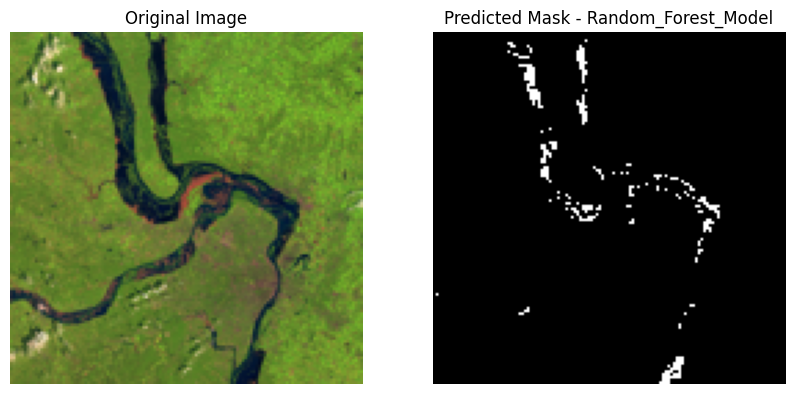

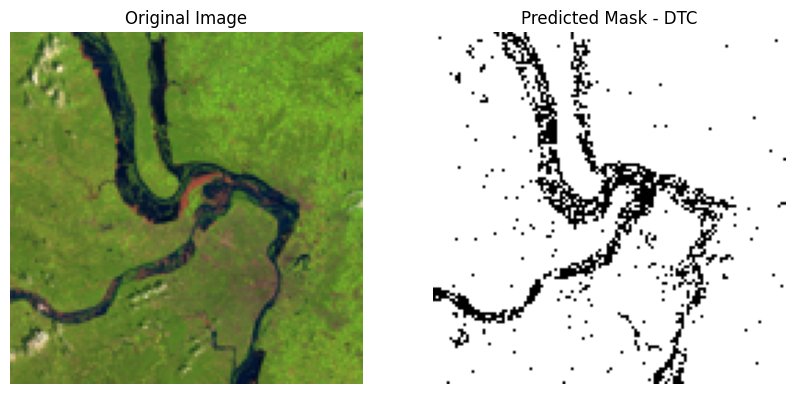

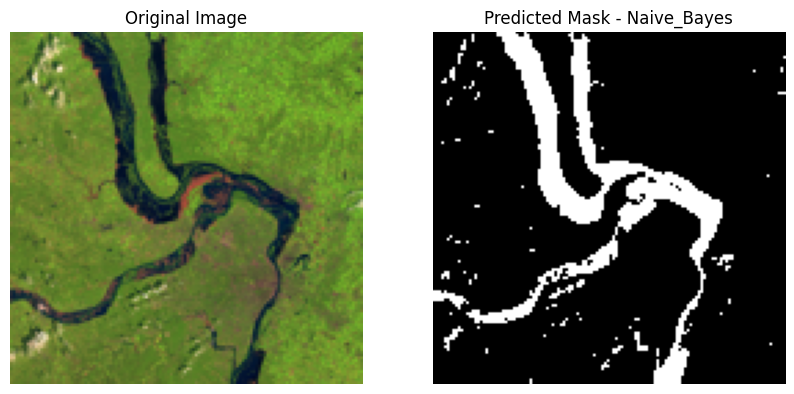

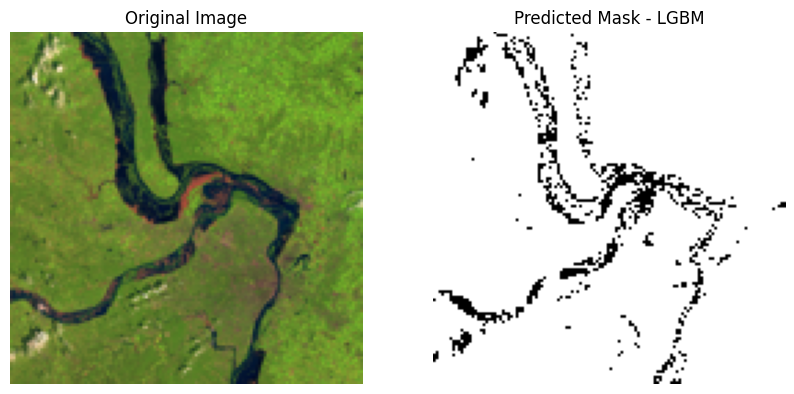

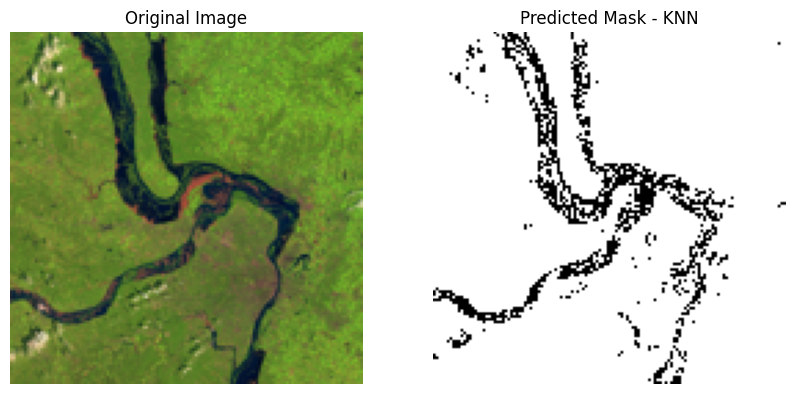

In [45]:
models_directory = os.path.dirname(os.path.abspath("Coastline.ipynb"))

# List of model filenames
model_filenames = ['Random_Forest_Model.pkl', 'DTC.pkl', 'Naive_Bayes.pkl', 'LGBM.pkl', 'KNN.pkl']

# Load the local image
local_image_path = os.path.join(models_directory, "stlouis_l5tm_19aug93_30m.jpg")  # Update with your image path
local_image = Image.open(local_image_path)
local_image = local_image.resize((128, 128))  # Resize for consistency with the training data

# Convert the image to a numpy array
local_image_array = np.array(local_image)

# Loop through each model
for model_filename in model_filenames:
    # Load the trained model
    loaded_model = joblib.load(os.path.join(models_directory, model_filename))

    # Predict using the loaded model
    predicted_mask = loaded_model.predict(local_image_array.reshape(-1, 3))

    # Plot the original image and predicted mask
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(local_image_array)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(predicted_mask.reshape(128, 128), cmap='gray')  # Assuming binary mask
    plt.title(f"Predicted Mask - {model_filename[:-4]}")  # Display model name without extension
    plt.axis('off')

    plt.show()